# 1. Import library

In [ ]:
import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

2.4.3
2.2.0


In [7]:
import pandas as pd
import csv
import keras
from numpy import dstack, hstack
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
import tensorflow as tf
from keras.layers import TimeDistributed 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import mean
from numpy import std
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

import spidev
from numpy import interp
from time import sleep
import RPi.GPIO as GPIO
import signal
import datetime, time
# from threading import _Timer
import csv
import termios,sys,tty, fcntl, os,select
import threading
from sklearn import preprocessing
import cv2

# 2. Load Dataset

In [2]:

data_filenames = ['Training_data/0/data_0_22_v7.csv','Training_data/0/data_0_22_2_v7.csv','Training_data/0/data_0_121_s1_t1_1_v7.csv', 'Training_data/0/data_0_211_s1_t1_1_v7.csv', 
                  'Training_data/0/data_0_220_s1_t1_1_v7.csv', 'Training_data/0/data_0_221_s1_t1_1_v7.csv', 
                  'Training_data/1/data_1_011_021_v7.csv','Training_data/1/data_1_120_122_v7.csv', 'Training_data/1/data_1_021_s1_t1_1_v7.csv',
                  'Training_data/1/data_1_120_s1_t1_1_v7.csv','Training_data/1/data_1_122_s1_t1_1_v7.csv', 'Training_data/1/data_1_021_s2_t1_1_v7.csv',
                  'Training_data/2/data_2_22_v7.csv','Training_data/2/data_2_22_2_v7.csv','Training_data/2/data_2_121_s1_t1_1_v7.csv','Training_data/2/data_2_211_s1_t1_1_v7.csv',
                  'Training_data/2/data_2_220_s1_t1_1_v7.csv','Training_data/2/data_2_221_s1_t1_1_v7.csv','Training_data/2/data_2_222_s1_t1_1_v7.csv',
                  'Training_data/3/data_3_22_v7.csv','Training_data/3/data_3_22_2_v7.csv','Training_data/3/data_3_121_s1_t1_1_v7.csv','Training_data/3/data_3_121_s2_t1_1_v7.csv',
                  'Training_data/3/data_3_220_s1_t1_1_v7.csv','Training_data/3/data_3_220_s2_t1_1_v7.csv','Training_data/3/data_3_221_s1_t1_1_v7.csv','Training_data/3/data_3_221_s2_t1_1_v7.csv',  
                  'Training_data/4/data_4_221_v7.csv', 'Training_data/4/data_4_221_2_v7.csv','Training_data/4/data_4_121_s1_t1_1_v7.csv','Training_data/4/data_4_121_s2_t1_1_v7.csv',
                  'Training_data/4/data_4_211_s1_t1_1_v7.csv', 'Training_data/4/data_4_211_s2_t1_1_v7.csv', 'Training_data/4/data_4_210_s1_t1_1_v7.csv','Training_data/4/data_4_210_s2_t1_1_v7.csv',
                  'Training_data/4/data_4_220_s1_t1_1_v7.csv','Training_data/4/data_4_220_s2_t1_1_v7.csv','Training_data/4/data_4_221_s1_t1_1_v7.csv','Training_data/4/data_4_221_s2_t1_1_v7.csv',
                  'Training_data/5/data_5_221_v7.csv', 'Training_data/5/data_5_221_2_v7.csv', 'Training_data/5/data_5_121_s1_t1_1_v7.csv','Training_data/5/data_5_121_s1_t2_1_v7.csv',
                  'Training_data/5/data_5_220_s1_t1_1_v7.csv','Training_data/5/data_5_220_s1_t2_1_v7.csv','Training_data/5/data_5_221_s1_t1_1_v7.csv','Training_data/5/data_5_221_s1_t2_1_v7.csv',
                  'Training_data/6/data_6_121_v7.csv', 'Training_data/6/data_6_221_220_v7.csv', 'Training_data/6/data_6_121_s1_t1_1_v7.csv','Training_data/6/data_6_221_s1_t1_1_v7.csv',
                  'Training_data/7/data_7_221_v7.csv','Training_data/7/data_7_221_3_v7.csv', 'Training_data/7/data_7_221_2_v7.csv', 'Training_data/7/data_7_121_s1_t1_1_v7.csv',
                  'Training_data/7/data_7_121_s2_t1_1_v7.csv','Training_data/7/data_7_121_s3_t1_1_v7.csv', 'Training_data/7/data_7_221_s1_t1_1_v7.csv',
                  'Training_data/7/data_7_221_s2_t1_1_v7.csv','Training_data/7/data_7_221_s3_t1_1_v7.csv',   
                  'Training_data/8/data_8_221_v7.csv', 'Training_data/8/data_8_221_3_v7.csv', 'Training_data/8/data_8_121_s1_t1_1_v7.csv','Training_data/8/data_8_121_s1_t2_1_v7.csv',
                  'Training_data/8/data_8_121_s1_t3_1_v7.csv', 'Training_data/8/data_8_220_s1_t1_1_v7.csv','Training_data/8/data_8_220_s1_t2_1_v7.csv','Training_data/8/data_8_220_s1_t3_1_v7.csv',
                  'Training_data/8/data_8_221_s1_t1_1_v7.csv','Training_data/8/data_8_221_s1_t2_1_v7.csv','Training_data/8/data_8_221_s1_t3_1_v7.csv','Training_data/8/data_8_221_s1_t4_1_v7.csv',
                  'Training_data/8/data_8_221_s1_t5_1_v7.csv','Training_data/8/data_8_121_s1_t4_1_v7.csv',
                  'Training_data/9/data_9_120_v7.csv', 'Training_data/9/data_9_221_220_v7.csv','Training_data/9/data_9_221_220_3_v7.csv',
                  'Training_data/9/data_9_120_s1_t1_1_v7.csv','Training_data/9/data_9_121_s1_t1_1_v7.csv','Training_data/9/data_9_220_s1_t1_1_v7.csv','Training_data/9/data_9_221_s1_t1_1_v7.csv']


label_filenames = ['Training_data/0/data_0_22_v7.csv_label_v1.txt','Training_data/0/data_0_22_2_v7.csv_label_v1.txt','Training_data/0/data_0_121_s1_t1_1_v7.csv_label_v1.txt', 
                    'Training_data/0/data_0_211_s1_t1_1_v7.csv_label_v1.txt', 'Training_data/0/data_0_220_s1_t1_1_v7.csv_label_v1.txt', 'Training_data/0/data_0_221_s1_t1_1_v7.csv_label_v1.txt', 
                  'Training_data/1/data_1_011_021_v7.csv_label_v1.txt','Training_data/1/data_1_120_122_v7.csv_label_v1.txt', 'Training_data/1/data_1_021_s1_t1_1_v7.csv_label_v1.txt',
                  'Training_data/1/data_1_120_s1_t1_1_v7.csv_label_v1.txt','Training_data/1/data_1_122_s1_t1_1_v7.csv_label_v1.txt','Training_data/1/data_1_021_s2_t1_1_v7.csv_label_v1.txt',
                  'Training_data/2/data_2_22_v7.csv_label_v1.txt','Training_data/2/data_2_22_2_v7.csv_label_v1.txt','Training_data/2/data_2_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/2/data_2_211_s1_t1_1_v7.csv_label_v1.txt',
                  'Training_data/2/data_2_220_s1_t1_1_v7.csv_label_v1.txt','Training_data/2/data_2_221_s1_t1_1_v7.csv_label_v1.txt','Training_data/2/data_2_222_s1_t1_1_v7.csv_label_v1.txt',
                  'Training_data/3/data_3_22_v7.csv_label_v1.txt','Training_data/3/data_3_22_2_v7.csv_label_v1.txt','Training_data/3/data_3_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/3/data_3_121_s2_t1_1_v7.csv_label_v1.txt',
                  'Training_data/3/data_3_220_s1_t1_1_v7.csv_label_v1.txt','Training_data/3/data_3_220_s2_t1_1_v7.csv_label_v1.txt','Training_data/3/data_3_221_s1_t1_1_v7.csv_label_v1.txt','Training_data/3/data_3_221_s2_t1_1_v7.csv_label_v1.txt',  
                  'Training_data/4/data_4_221_v7.csv_label_v1.txt', 'Training_data/4/data_4_221_2_v7.csv_label_v1.txt','Training_data/4/data_4_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/4/data_4_121_s2_t1_1_v7.csv_label_v1.txt',
                  'Training_data/4/data_4_211_s1_t1_1_v7.csv_label_v1.txt', 'Training_data/4/data_4_211_s2_t1_1_v7.csv_label_v1.txt', 'Training_data/4/data_4_210_s1_t1_1_v7.csv_label_v1.txt','Training_data/4/data_4_210_s2_t1_1_v7.csv_label_v1.txt',
                  'Training_data/4/data_4_220_s1_t1_1_v7.csv_label_v1.txt','Training_data/4/data_4_220_s2_t1_1_v7.csv_label_v1.txt','Training_data/4/data_4_221_s1_t1_1_v7.csv_label_v1.txt','Training_data/4/data_4_221_s2_t1_1_v7.csv_label_v1.txt',
                  'Training_data/5/data_5_221_v7.csv_label_v1.txt', 'Training_data/5/data_5_221_2_v7.csv_label_v1.txt', 'Training_data/5/data_5_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/5/data_5_121_s1_t2_1_v7.csv_label_v1.txt',
                  'Training_data/5/data_5_220_s1_t1_1_v7.csv_label_v1.txt','Training_data/5/data_5_220_s1_t2_1_v7.csv_label_v1.txt','Training_data/5/data_5_221_s1_t1_1_v7.csv_label_v1.txt','Training_data/5/data_5_221_s1_t2_1_v7.csv_label_v1.txt',
                  'Training_data/6/data_6_121_v7.csv_label_v1.txt', 'Training_data/6/data_6_221_220_v7.csv_label_v1.txt', 'Training_data/6/data_6_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/6/data_6_221_s1_t1_1_v7.csv_label_v1.txt',
                  'Training_data/7/data_7_221_v7.csv_label_v1.txt','Training_data/7/data_7_221_3_v7.csv_label_v1.txt', 'Training_data/7/data_7_221_2_v7.csv_label_v1.txt', 'Training_data/7/data_7_121_s1_t1_1_v7.csv_label_v1.txt',
                  'Training_data/7/data_7_121_s2_t1_1_v7.csv_label_v1.txt','Training_data/7/data_7_121_s3_t1_1_v7.csv_label_v1.txt', 'Training_data/7/data_7_221_s1_t1_1_v7.csv_label_v1.txt',
                  'Training_data/7/data_7_221_s2_t1_1_v7.csv_label_v1.txt','Training_data/7/data_7_221_s3_t1_1_v7.csv_label_v1.txt',   
                  'Training_data/8/data_8_221_v7.csv_label_v1.txt', 'Training_data/8/data_8_221_3_v7.csv_label_v1.txt', 'Training_data/8/data_8_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/8/data_8_121_s1_t2_1_v7.csv_label_v1.txt',
                  'Training_data/8/data_8_121_s1_t3_1_v7.csv_label_v1.txt', 'Training_data/8/data_8_220_s1_t1_1_v7.csv_label_v1.txt','Training_data/8/data_8_220_s1_t2_1_v7.csv_label_v1.txt','Training_data/8/data_8_220_s1_t3_1_v7.csv_label_v1.txt',
                  'Training_data/8/data_8_221_s1_t1_1_v7.csv_label_v1.txt','Training_data/8/data_8_221_s1_t2_1_v7.csv_label_v1.txt','Training_data/8/data_8_221_s1_t3_1_v7.csv_label_v1.txt',
                  'Training_data/8/data_8_221_s1_t4_1_v7.csv_label_v1.txt','Training_data/8/data_8_221_s1_t5_1_v7.csv_label_v1.txt','Training_data/8/data_8_121_s1_t4_1_v7.csv_label_v1.txt',
                  'Training_data/9/data_9_120_v7.csv_label_v1.txt', 'Training_data/9/data_9_221_220_v7.csv_label_v1.txt','Training_data/9/data_9_221_220_3_v7.csv_label_v1.txt',
                  'Training_data/9/data_9_120_s1_t1_1_v7.csv_label_v1.txt','Training_data/9/data_9_121_s1_t1_1_v7.csv_label_v1.txt','Training_data/9/data_9_220_s1_t1_1_v7.csv_label_v1.txt','Training_data/9/data_9_221_s1_t1_1_v7.csv_label_v1.txt']

data_test_filenames = [
                        'Testing_data/jundaWu_v2/data_0_jundaWu_v7.csv','Testing_data/jundaWu_v2/data_1_jundaWu_v7.csv','Testing_data/jundaWu_v2/data_2_jundaWu_v7.csv',
                        'Testing_data/jundaWu_v2/data_3_jundaWu_v7.csv','Testing_data/jundaWu_v2/data_4_jundaWu_v7.csv','Testing_data/jundaWu_v2/data_5_jundaWu_v7.csv',
                        'Testing_data/jundaWu_v2/data_6_jundaWu_v7.csv','Testing_data/jundaWu_v2/data_7_jundaWu_v7.csv','Testing_data/jundaWu_v2/data_8_jundaWu_v7.csv',
                        'Testing_data/jundaWu_v2/data_9_jundaWu_v7.csv',
                        'Testing_data/shixunWu_v2/data_0_shiXun_v7.csv','Testing_data/shixunWu_v2/data_1_shiXun_v7.csv','Testing_data/shixunWu_v2/data_2_shiXun_v7.csv',
                        'Testing_data/shixunWu_v2/data_3_shiXun_v7.csv','Testing_data/shixunWu_v2/data_4_shiXun_v7.csv','Testing_data/shixunWu_v2/data_5_shiXun_v7.csv',
                        'Testing_data/shixunWu_v2/data_6_shiXun_v7.csv','Testing_data/shixunWu_v2/data_7_shiXun_v7.csv','Testing_data/shixunWu_v2/data_8_shiXun_v7.csv',
                        'Testing_data/shixunWu_v2/data_9_shiXun_v7.csv',
                        'Testing_data/xinyunXu/data_0_XinyunXu_v7.csv','Testing_data/xinyunXu/data_1_XinyunXu_v7.csv','Testing_data/xinyunXu/data_2_XinyunXu_v7.csv',
                        'Testing_data/xinyunXu/data_3_XinyunXu_v7.csv','Testing_data/xinyunXu/data_4_XinyunXu_v7.csv','Testing_data/xinyunXu/data_5_XinyunXu_v7.csv',
                        'Testing_data/xinyunXu/data_6_XinyunXu_v7.csv','Testing_data/xinyunXu/data_7_XinyunXu_v7.csv','Testing_data/xinyunXu/data_8_XinyunXu_v7.csv',
                        'Testing_data/xinyunXu/data_9_XinyunXu_v7.csv',
                        'Testing_data/yuanhaoXie/data_0_xie_3_v7.csv','Testing_data/yuanhaoXie/data_1_xie_3_v7.csv','Testing_data/yuanhaoXie/data_2_xie_3_v7.csv',
                        'Testing_data/yuanhaoXie/data_3_xie_3_v7.csv','Testing_data/yuanhaoXie/data_4_xie_3_v7.csv','Testing_data/yuanhaoXie/data_5_xie_3_v7.csv',
                        'Testing_data/yuanhaoXie/data_6_xie_3_v7.csv','Testing_data/yuanhaoXie/data_7_xie_3_v7.csv','Testing_data/yuanhaoXie/data_8_xie_3_v7.csv',
                        'Testing_data/yuanhaoXie/data_9_xie_3_v7.csv',
                        'Testing_data/yuanhaoXie/data_0_xie_v7.csv','Testing_data/yuanhaoXie/data_1_xie_v7.csv','Testing_data/yuanhaoXie/data_2_xie_v7.csv',
                        'Testing_data/yuanhaoXie/data_3_xie_v7.csv','Testing_data/yuanhaoXie/data_4_xie_v7.csv','Testing_data/yuanhaoXie/data_5_xie_v7.csv',
                        'Testing_data/yuanhaoXie/data_6_xie_v7.csv','Testing_data/yuanhaoXie/data_7_xie_v7.csv','Testing_data/yuanhaoXie/data_8_xie_v7.csv',
                        'Testing_data/yuanhaoXie/data_9_xie_v7.csv',
                        'Testing_data/yuanhaoXie/data_0_xie_2_v7.csv', 'Testing_data/yuanhaoXie/data_3_xie_2_v7.csv',
                        'Testing_data/zehangWu/data_0_ZehangWu_v7.csv', 'Testing_data/zehangWu/data_1_ZehangWu_v7.csv', 'Testing_data/zehangWu/data_2_ZehangWu_v7.csv',
                        'Testing_data/zehangWu/data_3_ZehangWu_v7.csv', 'Testing_data/zehangWu/data_4_ZehangWu_v7.csv', 'Testing_data/zehangWu/data_5_ZehangWu_v7.csv',
                        'Testing_data/zehangWu/data_6_ZehangWu_v7.csv', 'Testing_data/zehangWu/data_7_ZehangWu_v7.csv', 'Testing_data/zehangWu/data_8_ZehangWu_v7.csv',
                        'Testing_data/zehangWu/data_9_ZehangWu_v7.csv',
                        'Testing_data/liang/data_0_Liang_v7.csv','Testing_data/liang/data_1_Liang_v7.csv','Testing_data/liang/data_2_Liang_v7.csv',
                        'Testing_data/liang/data_3_Liang_v7.csv','Testing_data/liang/data_4_Liang_v7.csv','Testing_data/liang/data_5_Liang_v7.csv',
                        'Testing_data/liang/data_6_Liang_v7.csv','Testing_data/liang/data_7_Liang_v7.csv','Testing_data/liang/data_8_Liang_v7.csv',
                        'Testing_data/liang/data_9_Liang_v7.csv',
                        'Testing_data/shixunWu/data_0_shiXun_v7.csv', 'Testing_data/shixunWu/data_1_shiXun_v7.csv','Testing_data/shixunWu/data_2_shiXun_v7.csv',
                        'Testing_data/shixunWu/data_3_shiXun_v7.csv','Testing_data/shixunWu/data_4_shiXun_v7.csv','Testing_data/shixunWu/data_5_shiXun_v7.csv',
                        'Testing_data/shixunWu/data_6_shiXun_v7.csv','Testing_data/shixunWu/data_7_shiXun_v7.csv','Testing_data/shixunWu/data_8_shiXun_v7.csv',
                        'Testing_data/shixunWu/data_9_shiXun_v7.csv'

                        ]
label_test_filenames = [
                        'Testing_data/jundaWu_v2/data_0_jundaWu_v7.csv_label_v1.txt','Testing_data/jundaWu_v2/data_1_jundaWu_v7.csv_label_v1.txt','Testing_data/jundaWu_v2/data_2_jundaWu_v7.csv_label_v1.txt',
                        'Testing_data/jundaWu_v2/data_3_jundaWu_v7.csv_label_v1.txt','Testing_data/jundaWu_v2/data_4_jundaWu_v7.csv_label_v1.txt','Testing_data/jundaWu_v2/data_5_jundaWu_v7.csv_label_v1.txt',
                        'Testing_data/jundaWu_v2/data_6_jundaWu_v7.csv_label_v1.txt','Testing_data/jundaWu_v2/data_7_jundaWu_v7.csv_label_v1.txt','Testing_data/jundaWu_v2/data_8_jundaWu_v7.csv_label_v1.txt',
                        'Testing_data/jundaWu_v2/data_9_jundaWu_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu_v2/data_0_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu_v2/data_1_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu_v2/data_2_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu_v2/data_3_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu_v2/data_4_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu_v2/data_5_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu_v2/data_6_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu_v2/data_7_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu_v2/data_8_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu_v2/data_9_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/xinyunXu/data_0_XinyunXu_v7.csv_label_v1.txt','Testing_data/xinyunXu/data_1_XinyunXu_v7.csv_label_v1.txt','Testing_data/xinyunXu/data_2_XinyunXu_v7.csv_label_v1.txt',
                        'Testing_data/xinyunXu/data_3_XinyunXu_v7.csv_label_v1.txt','Testing_data/xinyunXu/data_4_XinyunXu_v7.csv_label_v1.txt','Testing_data/xinyunXu/data_5_XinyunXu_v7.csv_label_v1.txt',
                        'Testing_data/xinyunXu/data_6_XinyunXu_v7.csv_label_v1.txt','Testing_data/xinyunXu/data_7_XinyunXu_v7.csv_label_v1.txt','Testing_data/xinyunXu/data_8_XinyunXu_v7.csv_label_v1.txt',
                        'Testing_data/xinyunXu/data_9_XinyunXu_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_0_xie_3_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_1_xie_3_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_2_xie_3_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_3_xie_3_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_4_xie_3_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_5_xie_3_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_6_xie_3_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_7_xie_3_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_8_xie_3_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_9_xie_3_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_0_xie_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_1_xie_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_2_xie_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_3_xie_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_4_xie_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_5_xie_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_6_xie_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_7_xie_v7.csv_label_v1.txt','Testing_data/yuanhaoXie/data_8_xie_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_9_xie_v7.csv_label_v1.txt',
                        'Testing_data/yuanhaoXie/data_0_xie_2_v7.csv_label_v1.txt', 'Testing_data/yuanhaoXie/data_3_xie_2_v7.csv_label_v1.txt',
                        'Testing_data/zehangWu/data_0_ZehangWu_v7.csv_label_v1.txt', 'Testing_data/zehangWu/data_1_ZehangWu_v7.csv_label_v1.txt', 'Testing_data/zehangWu/data_2_ZehangWu_v7.csv_label_v1.txt',
                        'Testing_data/zehangWu/data_3_ZehangWu_v7.csv_label_v1.txt', 'Testing_data/zehangWu/data_4_ZehangWu_v7.csv_label_v1.txt', 'Testing_data/zehangWu/data_5_ZehangWu_v7.csv_label_v1.txt',
                        'Testing_data/zehangWu/data_6_ZehangWu_v7.csv_label_v1.txt', 'Testing_data/zehangWu/data_7_ZehangWu_v7.csv_label_v1.txt', 'Testing_data/zehangWu/data_8_ZehangWu_v7.csv_label_v1.txt',
                        'Testing_data/zehangWu/data_9_ZehangWu_v7.csv_label_v1.txt',
                        'Testing_data/liang/data_0_Liang_v7.csv_label_v1.txt','Testing_data/liang/data_1_Liang_v7.csv_label_v1.txt','Testing_data/liang/data_2_Liang_v7.csv_label_v1.txt',
                        'Testing_data/liang/data_3_Liang_v7.csv_label_v1.txt','Testing_data/liang/data_4_Liang_v7.csv_label_v1.txt','Testing_data/liang/data_5_Liang_v7.csv_label_v1.txt',
                        'Testing_data/liang/data_6_Liang_v7.csv_label_v1.txt','Testing_data/liang/data_7_Liang_v7.csv_label_v1.txt','Testing_data/liang/data_8_Liang_v7.csv_label_v1.txt',
                        'Testing_data/liang/data_9_Liang_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu/data_0_shiXun_v7.csv_label_v1.txt', 'Testing_data/shixunWu/data_1_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu/data_2_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu/data_3_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu/data_4_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu/data_5_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu/data_6_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu/data_7_shiXun_v7.csv_label_v1.txt','Testing_data/shixunWu/data_8_shiXun_v7.csv_label_v1.txt',
                        'Testing_data/shixunWu/data_9_shiXun_v7.csv_label_v1.txt'

                        ]   

In [3]:
def create_label_frame(file_name):
  label_frame = pd.DataFrame(columns = ['label'])
  for i, file in enumerate(file_name):
    data = pd.read_csv(file, names = ['label'])
    label_frame = pd.concat([label_frame, data], axis = 0, ignore_index = True)
  return label_frame

def create_data_frame(file_name):
  data_frame = []
  for i, file in enumerate(file_name):
    data = pd.read_csv(file)
    data_frame.append (data)
  data_frame = pd.concat(data_frame, join = 'outer')
  return data_frame

def data_3D_transfer(photodiode_arr, data_frame):
  data_3D = list()
  for i, photodiode_name in enumerate(photodiode_arr):
    data_3D.append(data_frame[photodiode_name].values.reshape(-1, ))  
  data_3D = dstack(data_3D)
  data_3D = data_3D.reshape((-1, 300, 9))
  return data_3D

def load_dataset():
                                         
  photodiode_arr = ['6', '1', '2', '3', '9', '8', '7', '4', '5']
  label_frame = create_label_frame(label_filenames)
  label_test_frame = create_label_frame(label_test_filenames)
  data_frame = create_data_frame(data_filenames)
  data_test_frame = create_data_frame(data_test_filenames)
  data_3D = data_3D_transfer(photodiode_arr, data_frame)
  data_test_3D = data_3D_transfer(photodiode_arr, data_test_frame)
  data_y = label_frame
  data_test_y = label_test_frame
  data_y = to_categorical(data_y,num_classes=10)
  print('data_y : ', len(data_y))
  print('data_test_y : ', len(data_test_y))
  data_test_y = to_categorical(data_test_y,num_classes=10)
  # Xtra,Xval,Ytra,Yval = train_test_split(data_3D,data_y,test_size=0.2,shuffle=True)
  return  data_3D, data_y, data_test_3D,  data_test_y
  # return  Xtra,Ytra, data_test_3D,  data_test_y, Xval,Yval

# not use

In [ ]:
def load_dataset():
  # data_filenames = ['data_0v3_2.csv','data_1v3_2.csv','data_2v3_2.csv','data_3v3_2.csv','data_7v3_2.csv','data_8v3_2.csv',
                    # 'data_9v3_2.csv','data_4v3_3.csv','data_5v3_3.csv','data_6v3_3.csv']
  data_filenames = ['data_0_v5_3.csv','data_1_v5_3.csv','data_2_v5_3.csv','data_3_v5_3.csv','data_4_v5_3.csv','data_5_v5_3.csv','data_6_v5_3.csv','data_7_v5_3.csv'
  ,'data_8_v5_3.csv','data_9_v5_3.csv']
  photodiode_arr = ['6','1','2','3','9','8','7','4','5']
  data_frame = []
  for i,file in enumerate (data_filenames):
    data = pd.read_csv(file)
    data_frame.append (data)
  data_frame = pd.concat(data_frame, join = 'inner')
  data_3D = list()
  for i, photodiode_name in enumerate(photodiode_arr):
    data_3D.append(data_frame[photodiode_name].values.reshape(-1, ))  
  data_3D = dstack(data_3D)
  data_3D = data_3D.reshape((-1, 500,9))
  data_y = pd.read_csv('label_v5.csv')
  result_none = np.where(data_y == -1)
  data_y = data_y.drop([data_y.index[260],   data_y.index[891],   data_y.index[892]], axis = 0)
  data_3D = np.delete(data_3D, [260, 891, 892 ], axis = 0)
  data_y = to_categorical(data_y,num_classes=10)
  Xtra,Xval,Ytra,Yval = train_test_split(data_3D,data_y,test_size=0.2,shuffle=True)
  return Xtra, Ytra, Xval, Yval


# 3. Build the model

In [1]:
learning_rate = [0.001]
verbose, epochs  = 0, 20
Batch_size = [32]

n_steps, n_length = 60, 5
num_filters = [32]
num_kernels = [3]
num_lstm_Neurons = [1024]
num_fcn_Neurons = [1024]
Attention_Neurons = [1]

In [1]:
def build_model(att_neuron, num_lstm_Neuron, num_fcn_Neuron, num_filter,num_kernel, n_timesteps, n_steps, n_length, n_features, n_outputs):
  inputs = Input(shape = (n_steps, n_length, n_features))
  TDCnn = TimeDistributed(Conv1D(filters= 32, kernel_size=3,  activation = 'relu'))(inputs)
  dp = TimeDistributed(Dropout(0.5))(TDCnn)
  Pool = TimeDistributed(MaxPooling1D(pool_size =3))(dp)
  flat = TimeDistributed(Flatten())(Pool)
  gru = GRU(num_lstm_Neuron, return_sequences = False)(flat)
  dp1 = Dropout(0.5)(gru)
  den1 = Dense(num_fcn_Neuron, activation='relu')(dp1)
  dp2 = Dropout(0.5)(den1)
  den2 = Dense(num_fcn_Neuron, activation='relu')(dp2)
  dp3 = Dropout(0.5)(den2)
  output = Dense(n_outputs, activation='softmax')(dp3)
  model = Model(inputs = inputs, outputs = output) 
  return model   

# not use

In [ ]:

def build_model(): 
  # model.add(GRU(150, input_shape=(n_timesteps,n_features), return_sequences=True))
  # model.add(GRU(50))
  model.add(GRU(80, input_shape=(n_timesteps,n_features), return_sequences=False))
  # model.add(LSTM(80))
  # model.add(Dropout(0.2))
  # model.add(GRU(150))
  # model.add(Bidirectional( GRU(100))) 
  # model.add(Dropout(0.5))
  # model.add(Dense(100, activation='relu'))
  model.add(Dense(80, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.summary()


# 4. Training the model

In [6]:
def evaluate_model(trainX, trainy, testX, testy, valX, valy,learningRate,batch_size,num_filter, num_kernel, att_neurons, num_lstm_Neuron, num_fcn_Neuron, n_timesteps, n_steps, n_length,n_features, n_outputs):
  model = Sequential()
  model = build_model(att_neurons, num_lstm_Neuron, num_fcn_Neuron,num_filter, num_kernel,n_timesteps, n_steps, n_length, n_features, n_outputs)
  optimizer = keras.optimizers.Adam(learning_rate=learningRate) 
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	# earlyStopping= EarlyStopping(monitor='val_loss', patience=50, mode='auto', verbose=1, restore_best_weights=True)
  history = model.fit(trainX, trainy, epochs=epochs, validation_data=(valX, valy), batch_size=batch_size, verbose=verbose, shuffle=True)   
	# _, accuracy = model.evaluate(testX, testy,batch_size=batch_size, verbose=0)
  model_checkpoint = ModelCheckpoint('CNNLSTMFCN_v1.hdf5', save_best_only=True, monitor='val_accuracy', mode='auto', save_weights_only=True) 
	# model_checkpoint= ModelCheckpoint('CNNLSTMFCN_v1.hdf5', save_best_only=True, monitor='val_accuracy', mode='auto', save_weights_only=True) 
  accuracy = max(history.history['val_accuracy'])
  return model, accuracy, history

def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

def run_experiment(repeats, learningRate, batch_size, num_filter, num_kernel, att_neurons, num_lstm_Neuron, num_fcn_Neuron, trainX, trainy, testX, testy, valX, valy,n_timesteps,n_steps,n_length, n_features, n_outputs, cvscores):
	# load data
	# trainX, trainy, testX, testy, valX, valy = load_dataset()
	scores = list()
	for r in range(repeats):
		# model = Sequential()
		#build_model()    
		model, score, history = evaluate_model(trainX, trainy, testX, testy, valX, valy ,learningRate, batch_size,num_filter, num_kernel, att_neurons, num_lstm_Neuron, num_fcn_Neuron,n_timesteps, n_steps, n_length,n_features, n_outputs)
		score = score * 100.0
		cvscores.append(score)
		# print('>#%d: %.3f' % (r+1, score))
		# scores.append(score)
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('Training Loss VS Validation Loss')
		plt.ylabel('Loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'val'], loc='upper left')
		plt.show()
		print('Training Accuracy : ', max(history.history['accuracy']))   
		print('Validation Accuracy : ', max(history.history['val_accuracy']))  
		plt.plot(history.history['accuracy'])
		plt.plot(history.history['val_accuracy'])
		plt.title('Training ACC VS Validation ACC')
		plt.ylabel('Acc')
		plt.xlabel('epoch')
		plt.legend(['train', 'val'], loc='upper left')
		plt.show()  
		# if score > 90.0:
		#  break
	model.summary()  
	# summarize_results(scores)
	return model, cvscores

# not use

In [ ]:
def evaluate_model(trainX, trainy, testX, testy):
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_checkpoint= ModelCheckpoint('RNN_model_weights.hdf5', save_best_only=True, monitor='val_loss', 
                                      mode='auto', save_weights_only=True)
        # fit network
        history = model.fit(trainX, trainy, epochs=epochs, validation_split=0.2, batch_size=batch_size, verbose=verbose)
        # evaluate model
        _, accuracy = model.evaluate(testX, testy,batch_size=batch_size, verbose=0)
        return accuracy, history

def summarize_results(scores):
        print(scores)
        m, s = mean(scores), std(scores)
        print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

def run_experiment(repeats=10):
   
        build_model()
        
        scores = list()
        for r in range(repeats):
            score, history = evaluate_model(trainX, trainy, testX, testy)
            score = score * 100.0
            print('>#%d: %.3f' % (r+1, score))
            scores.append(score)
#             plt.plot(history.history['loss'])
#             plt.plot(history.history['val_loss'])
#             plt.title('Training Loss VS Validation Loss')
#             plt.ylabel('Loss')
#             plt.xlabel('epoch')
#             plt.legend(['train', 'val'], loc='upper left')
#             plt.show()
        # summarize results
        summarize_results(scores)

# 5. Initialize the SPI and TERMIO

In [2]:
def spi_init():
        spi.open(0,0)
        spi.max_speed_hz =1350000
        spi2.open(0,1)
        spi2.max_speed_hz =1350000
        
def termios_init():
        newattr[3] = newattr[3] & ~termios.ICANON & ~termios.ECHO
        termios.tcsetattr(fd, termios.TCSANOW, newattr)
        fcntl.fcntl(fd, fcntl.F_SETFL, oldflags | os.O_NONBLOCK)

# 6. Timer Class

In [3]:
class RepeatedTimer(object):
  def __init__(self, interval, function, *args, **kwargs):
    self._timer = None
    self.interval = interval
    self.function = function
    self.args = args
    self.kwargs = kwargs
    self.is_running = False
    self.next_call = time.time()
    self.start()

  def _run(self):
    self.is_running = False
    self.start()
    self.function(*self.args, **self.kwargs)

  def start(self):
    if not self.is_running:
      self.next_call += self.interval
      self._timer = threading.Timer(self.next_call - time.time(), self._run)
      self._timer.start()
      self.is_running = True

  def stop(self):
    self._timer.cancel()
    self.is_running = False

# 7. Read Sensor Data

In [4]:
def get_char():
    fd = sys.stdin.fileno()
    old_settings = termios.tcgetattr(fd)
    try:
        tty.setraw(sys.stdin.fileno())
        ch = sys.stdin.read(1)
    finally:
        termios.tcsetattr(fd, termios.TCSADRAIN, old_settings)
    return ch


def analogInput_CE0(channel,spi):
    adc = spi.xfer2([1, (8+channel)<<4, 0])
    data = ((adc[1]&3) <<8) + adc[2]
    return data

def analogInput_CE1(channel,spi2):
    adc = spi2.xfer2([1, (8+channel)<<4, 0])
    data = ((adc[1]&3) <<8) + adc[2]
    return data

def read_data():
        if len(output)  < 500:
            aux = []
#             aux.append(time.time())
            aux.append(analogInput_CE1(2,spi2))
            aux.append(analogInput_CE0(3,spi))
            aux.append(analogInput_CE0(7,spi))
            aux.append(analogInput_CE1(3,spi2))
            aux.append(analogInput_CE1(1,spi2))
            aux.append(analogInput_CE0(5,spi))
            aux.append(analogInput_CE0(1,spi))
            aux.append(analogInput_CE0(2,spi))
            aux.append(analogInput_CE0(6,spi))
            output.append(aux)
        

# load and repshAPE DATA

In [7]:
trainX, trainy, valX, valy = load_dataset()
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

data_y :  9363
data_test_y :  2228


In [8]:
trainX1 = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features)) 
valX1 = valX.reshape((valX.shape[0],n_steps, n_length, n_features)) 

n_steps :  60
n_length :  5
batch_size :   32
learningRate :   0.001
num_filter :   32
num_kernel :   3
num_fcn_Neurons :   1024
num_lstm_neurons :   1024
num_Att_neurons :  1


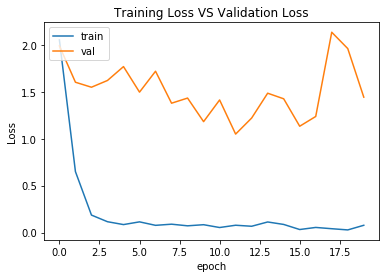

Training Accuracy :  0.9938054084777832
Validation Accuracy :  0.7495511770248413


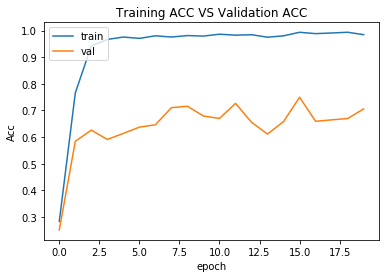

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 5, 9)]        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 3, 32)         896       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 3, 32)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 60, 1, 32)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 60, 32)            0         
_________________________________________________________________
gru (GRU)                    (None, 1024)              3250176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0     

In [9]:
cvscores = []
for att_neurons in Attention_Neurons:
  for j in range(len(num_fcn_Neurons)):
    for num_kernel in num_kernels:
      for num_filter in num_filters:  
        for learningRate in learning_rate:     
          for batch_size in Batch_size:
            for i in range(len(num_lstm_Neurons)): 
              print('n_steps : ', n_steps)
              print('n_length : ', n_length)
              print('batch_size :  ', batch_size)
              print('learningRate :  ', learningRate)
              print('num_filter :  ', num_filter)
              print('num_kernel :  ', num_kernel)
              print('num_fcn_Neurons :  ', num_fcn_Neurons[j])
              print('num_lstm_neurons :  ', num_lstm_Neurons[i]) 
              print('num_Att_neurons : ', att_neurons)          
              prev_time = time.time()
              model, cvscores = run_experiment(repeats=1, learningRate= learningRate, batch_size = batch_size, num_filter= num_filter, num_kernel = num_kernel, att_neurons = att_neurons, num_lstm_Neuron = num_lstm_Neurons[i], num_fcn_Neuron = num_fcn_Neurons[j],trainX= trainX1, trainy=trainy, testX=None, testy= None, valX=valX1, valy= valy, n_timesteps = n_timesteps, n_steps=n_steps, n_length = n_length, n_features=n_features, n_outputs=n_outputs, cvscores = cvscores)
              print('Interval is : ', time.time() - prev_time)
              print('-----------------------------------------')

# SAVE MODEL

In [10]:
from tensorflow.keras.models import save_model, load_model
filepath = './CNNLSTMFCN_v3'
save_model(model, filepath, save_format='h5')
# model = load_model('saved_model4')

# not use

In [ ]:
    # Training model
prev_time = time.time()
verbose, epochs, batch_size, num_Neurons = 0, 40, 128, 100
trainX, trainy, testX, testy = load_dataset()
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]    
model = Sequential() 
run_experiment()
print('Interval is : ', time.time() - prev_time)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 80)                21840     
_________________________________________________________________
dense (Dense)                (None, 80)                6480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 29,130
Trainable params: 29,130
Non-trainable params: 0
_________________________________________________________________
>#1: 100.000
>#2: 100.000
>#3: 100.000
>#4: 100.000
>#5: 100.000
>#6: 100.000
>#7: 100.000
>#8: 100.000
>#9: 100.000
>#10: 100.000
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Accuracy: 100.000% (+/-0.000)
Interval is :  12833.48143696785


In [5]:
from keras.models import save_model, load_model
# filepath = './saved_model'
# save_model(model, filepath, save_format='h5')
model = load_model("CNNLSTMFCN_v2")

In [7]:
if __name__ == '__main__':

    
    
    global spi, spi2, output,fd, oldterm, newattr, oldflags, real_data_3D
    spi = spidev.SpiDev()
    spi2 = spidev.SpiDev()
    output = []
#     fd = sys.stdin.fileno()
#     oldterm = termios.tcgetattr(fd)
#     oldflags = fcntl.fcntl(fd, fcntl.F_GETFL)
#     newattr = termios.tcgetattr(fd)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 100), copy = True)
    spi_init()
#     termios_init()
    RepeatedTimer(0.01,read_data).start()
    while 1:
        inkey = input()
        if inkey == 'n':
            print('start get input')
            output = []
            sleep(5.5)
            output_3D = []
            output_3D.append(min_max_scaler.fit_transform(output[0:500]))
            real_data_3D = np.array(output_3D)
#             real_data_3D = min_max_scaler.fit_transform()
#             print(real_data_3D.shape)
            real_data_3D.reshape((-1, 300, 9))
            real_data_3D = real_data_3D.reshape((-1, 60, 5, 9))
#             print(real_data_3D)
            label = model.predict(real_data_3D)
#             print("label is ", label)
            print('label is ', np.argmax(label))   

NameError: name 'spidev' is not defined

In [8]:
from scipy.signal import savgol_filter
from sklearn import preprocessing
import cv2

def min_max_scale(X, range=(0, 100)):
    mi, ma = range
    max_list = X.max()
    min_list = X.min()
    max_val = max_list.max(axis=0)
    min_val = min_list.min(axis=0)
    X_std = (X - min_val) / (max_val - min_val)
    X_scaled = X_std * (ma - mi) + mi
    return X_scaled

if __name__ == '__main__':  
    global spi, spi2, output,fd, oldterm, newattr, oldflags, real_data_3D
    spi = spidev.SpiDev()
    spi2 = spidev.SpiDev()
    output = []
    spi_init()
    RepeatedTimer(0.01,read_data).start()
    while 1:
        inkey = input()
        if inkey == 'n':
            print('start get input')
            output = []
            sleep(5.5)
#             output_3D = []
#             output_3D.append(output[0:500])
#             real_data_3D = np.array(output_3D)
#             print(real_data_3D.shape)
            # 1. remove outliers
#             print(output.shape)
            data_v1 = pd.DataFrame(output[0:500], columns = ['6', '1', '2', '3', '9', '8', '7', '4', '5'])
            print(data_v1.head(1))
            Q1 = data_v1.quantile(0.01)
            Q3 = data_v1.quantile(0.99)
            for m in range(1, 10, 1):
                data_v1.loc[data_v1[str(m)] > Q3[str(m)], str(m)] = Q3[str(m)]
                data_v1.loc[data_v1[str(m)] < Q1[str(m)], str(m)] = Q1[str(m)]
            data_v2 = savgol_filter(data_v1[['6', '1', '2', '3', '9', '8', '7', '4', '5']], 35, 7, axis = 0)
            data_v2 = pd.DataFrame(data_v2, columns = ['6', '1', '2', '3', '9', '8', '7', '4', '5'])
#             print('------------------')
#             print(data_v2.head(10))            
            max_list = data_v2.max()
            max_val = max_list.max(axis = 0)
            diff_list = max_val - max_list
            for m in range(1, 10, 1):
                data_v2.loc[:, str(m)] = data_v2.loc[:, str(m)] + diff_list[str(m)]
            data_v3 = min_max_scale(data_v2)
#             print('------------------')
#             print(data_v3.head(10))
            data_v3 = pd.DataFrame(data_v3, columns = ['6', '1', '2', '3', '9', '8', '7', '4', '5'])            
            start_point = data_v3[((data_v3['1'] <= 70) & (data_v3['1'] > 0)) | 
                                  ((data_v3['2'] <= 70) & (data_v3['2'] > 0)) | 
                                  ((data_v3['3'] <= 70) & (data_v3['3'] > 0)) | 
                                  ((data_v3['4'] <= 70) & (data_v3['4'] > 0)) | 
                                  ((data_v3['5'] <= 70) & (data_v3['5'] > 0)) | 
                                  ((data_v3['6'] <= 70) & (data_v3['6'] > 0)) | 
                                  ((data_v3['7'] <= 70) & (data_v3['7'] > 0)) | 
                                  ((data_v3['8'] <= 70) & (data_v3['8'] > 0)) | 
                                  ((data_v3['9'] <= 70) & (data_v3['9'] > 0)) ]
            if (start_point.empty):
                break
            start = int(start_point.index[0])
            end = int(start_point.index[-1])
            if (start - 10 >= 0):
                start -= 10
            if (end + 10 <= 499):
                end += 10
            pic = cv2.resize(data_v3.loc[start: end, ['6', '1', '2', '3', '9', '8', '7', '4', '5']].values, (9, 300), interpolation =  cv2.INTER_LINEAR)
            start_point.iloc[0:0]
            data_v4 = pd.DataFrame(pic, columns = ['6', '1', '2', '3', '9', '8', '7', '4', '5'])
#             print(data_v4.shape)
#             print('------------------')
#             print(data_v4.head(10))
            data_v4.values.reshape((-1, 300, 9))
            real_data_3D = data_v4.values.reshape((-1, 60, 5, 9))
#             print(real_data_3D)
            label = model.predict(real_data_3D)
#             print("label is ", label)
            print('label is ', np.argmax(label))

n
start get input
     6    1    2    3    9    8    7    4    5
0  309  307  293  324  313  303  303  300  309
label is  0
n
start get input
     6    1    2    3    9    8    7    4    5
0  312  311  304  341  312  326  329  320  342
label is  2
n
start get input
     6    1    2    3    9    8    7    4    5
0  315  326  307  323  321  324  324  324  324
label is  2
n
start get input
     6    1    2    3    9    8    7    4    5
0  327  306  316  320  323  318  325  311  325
label is  2
n
start get input
     6    1    2    3    9    8    7    4    5
0  328  334  302  341  332  325  341  333  329
label is  2
n
start get input
     6    1    2    3    9    8    7    4    5
0  324  312  317  324  332  328  327  315  321
label is  4
n
start get input
     6    1    2    3    9    8    7    4    5
0  325  315  304  336  320  327  324  320  316
label is  5
n
start get input
     6    1    2    3    9    8    7    4    5
0  326  324  328  332  341  319  337  328  330
label is  6
n
start 

KeyboardInterrupt: 

In [ ]:
a = input()

2
